In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

In [2]:
# ChatGPT
def crop_to_fill(image, target_width, target_height):
    """Crop the image to the target dimensions while keeping it centered."""
    img_width, img_height = image.size
    aspect_ratio = target_width / target_height
    img_aspect_ratio = img_width / img_height

    # Determine cropping area
    if img_aspect_ratio > aspect_ratio:
        # Image is wider than target aspect ratio
        new_width = int(aspect_ratio * img_height)
        left = (img_width - new_width) // 2
        top = 0
        right = left + new_width
        bottom = img_height
    else:
        # Image is taller than target aspect ratio
        new_height = int(img_width / aspect_ratio)
        left = 0
        top = (img_height - new_height) // 2
        right = img_width
        bottom = top + new_height

    # Crop the image
    return image.crop((left, top, right, bottom)).resize((target_width, target_height))

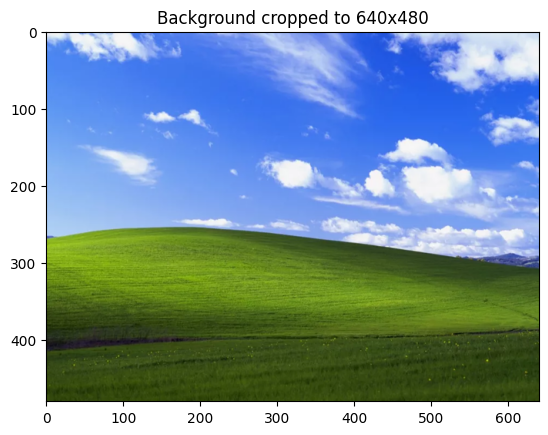

In [3]:
background = Image.open("images/windowsxp.webp")

# Scale the background to 640x480, cropping to maintain aspect ratio and centering
background = crop_to_fill(background, 640, 480)

# Create a new 640x480 image with a white background
plt.imshow(background)
plt.title("Background cropped to 640x480")
plt.show()

In [4]:
def paste_image(prev_img: Image.Image, img_path: str, new_width: int, xy: tuple[int, int]):
    """Paste an image onto another image."""
    img = Image.open(img_path)
    width, height = img.size
    aspect_ratio = width / height
    new_height = int(new_width / aspect_ratio)

    img = img.resize((new_width, new_height))
    img = img.convert("RGBA")

    new_image = prev_img.copy()
    new_image.paste(img, xy, img)

    return new_image

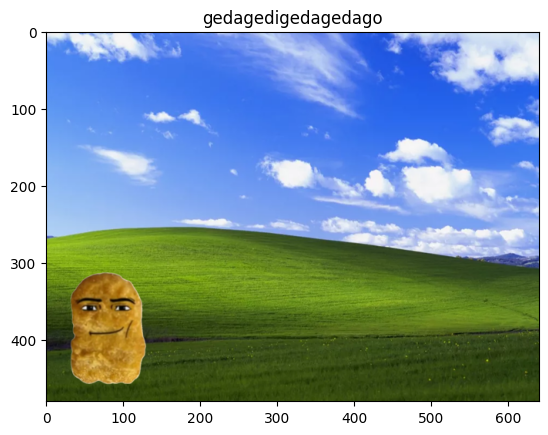

In [5]:
# Add Nugget
background_2 = paste_image(background, "images/nugget.png", 150, (0, 310))

# Show the image
plt.imshow(background_2)
plt.title("gedagedigedagedago")
plt.show()

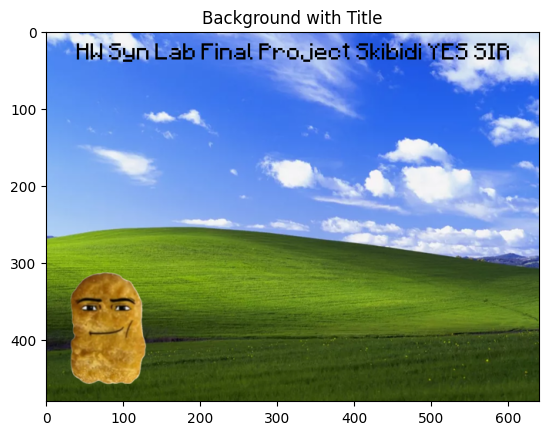

In [8]:
# Use font images/minecraft_font.ttf
font = ImageFont.truetype("images/minecraft_font.ttf", 24)

# Draw text
background_3 = background_2.copy()
draw = ImageDraw.Draw(background_3)
draw.text((40, 10), "HW Syn Lab Final Project Skibidi YES SIR", font=font, fill="black")

# Show the image
plt.imshow(background_3)
plt.title("Background with Title")
plt.show()

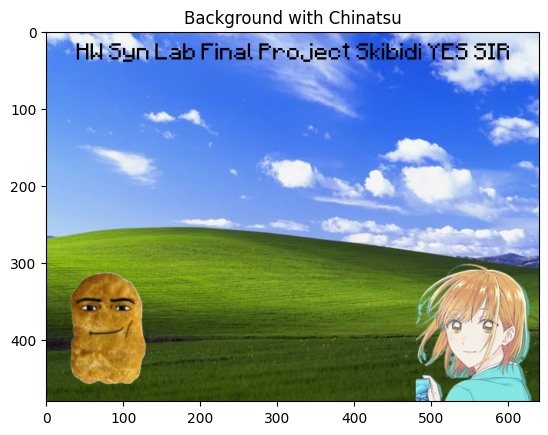

In [9]:
# Add 千夏
background_4 = paste_image(background_3, "images/chinatsu-ed.png", 150, (480, 300))

# Show Image
plt.imshow(background_4)
plt.title("Background with Chinatsu")
plt.show()

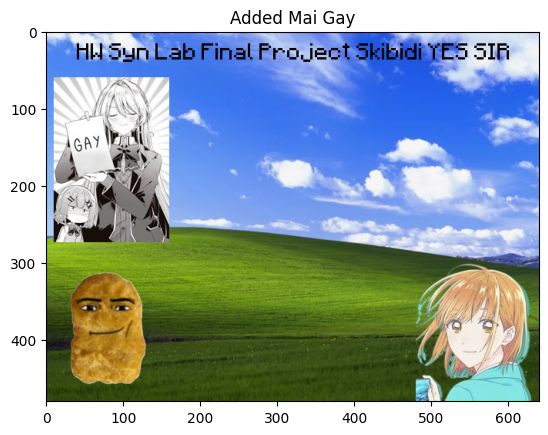

In [11]:
# Add Mai
background_5 = paste_image(background_4, "images/mai-gay.png", 150, (10, 60))

# Show Image
plt.imshow(background_5)
plt.title("Added Mai Gay")
plt.show()

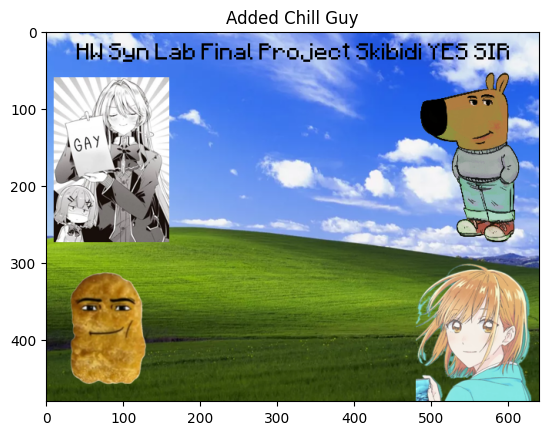

In [40]:
# Add Chill Guy
background_6 = paste_image(background_5, "images/chill-guy.png", 240, (440, 50))

# Show Image
plt.imshow(background_6)
plt.title("Added Chill Guy")
plt.show()

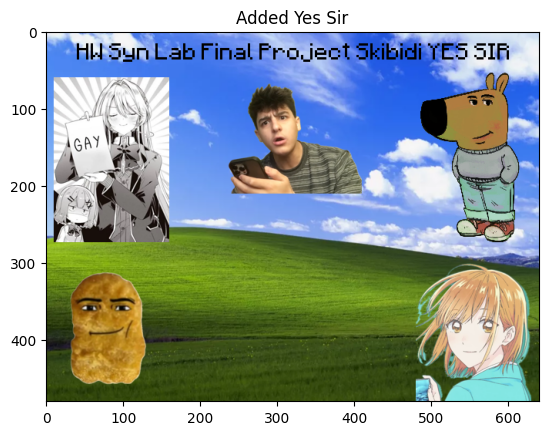

In [41]:
# Add Yes Sir
background_7 = paste_image(background_6, "images/yessir.png", 200, (210, 50))

# Show Image
plt.imshow(background_7)
plt.title("Added Yes Sir")
plt.show()

In [27]:
twoyr = Image.open("images/2year4mo.jpg")

# Replace White Color with Alpha
twoyr = twoyr.convert("RGBA")
data = np.array(twoyr)
r, g, b, a = data[:, :, 0], data[:, :, 1], data[:, :, 2], data[:, :, 3]
white_areas = (r > 150) & (g > 150) & (b > 150)
data[:, :, 3] = np.where(white_areas, 0, a)
twoyr = Image.fromarray(data)

twoyr.save("images/2year4mo.png")

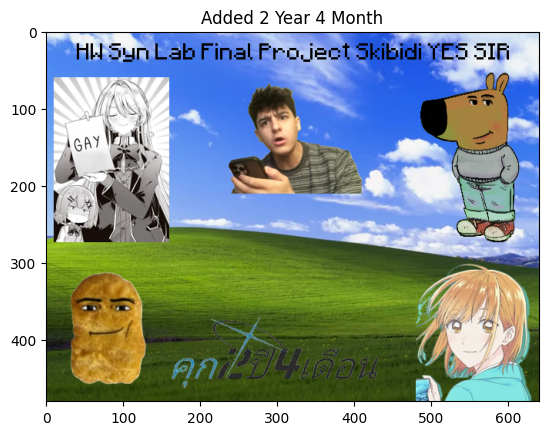

In [42]:
# Add 2 Year 4 Month
background_8 = paste_image(background_7, "images/2year4mo.png", 300, (150, 360))

# Show Image
plt.imshow(background_8)
plt.title("Added 2 Year 4 Month")
plt.show()

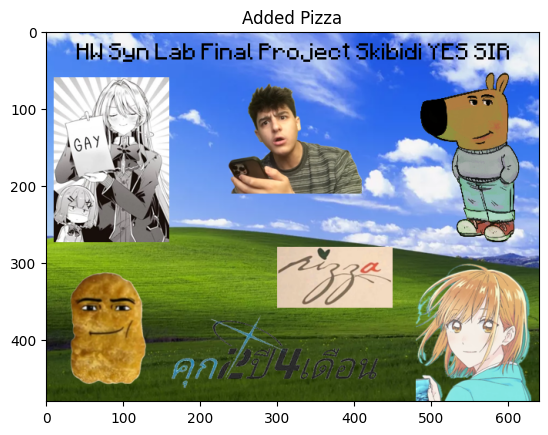

In [43]:
# Add pizza
background_9 = paste_image(background_8, "images/pizza-real.jpg", 150, (300, 280))

# Show Image
plt.imshow(background_9)
plt.title("Added Pizza")
plt.show()

Box width: 300, Box height: 48


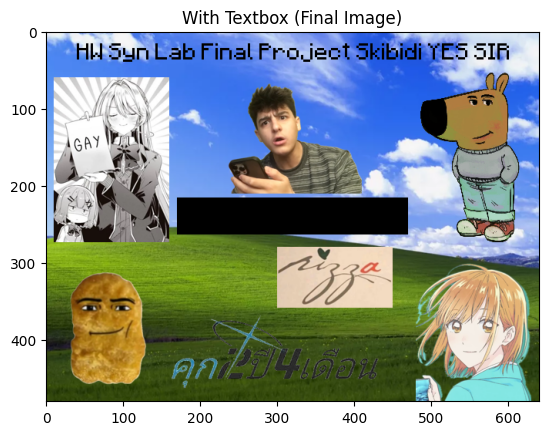

In [44]:
# Add Block
ALPHABET_COUNT = 8
ALPHABET_SIZE = 32
GAP = 4
PADDING = 8

box_width = 2 * PADDING + ALPHABET_COUNT * ALPHABET_SIZE + (ALPHABET_COUNT - 1) * GAP
box_height = 2 * PADDING + ALPHABET_SIZE

print(f"Box width: {box_width}, Box height: {box_height}")

# Create textbox
textbox = Image.new("RGB", (box_width, box_height), "black")

# Paste at center of image
background_final = background_9.copy()
background_final.paste(textbox, (320 - box_width // 2, 240 - box_height // 2))

# Show the image
plt.imshow(background_final)
plt.title("With Textbox (Final Image)")
plt.show()

background_final.save("images/background-final.png")